In [156]:
%run ./Code.ipynb

In [159]:
train_md, test_md = loadMetadata(True)

# OOF

In [140]:
dataset_name, filename_add, filename_add2, feat_sz = getDSParams(dataset)

stg = time.time()
for fold in range(0,1):
    predictions = oof_one(num_iter=32, bs=bs, fold=fold)
    pickle.dump(predictions, open(PATH_WORK/'oof_{}_f{}_v{}'.format(dataset_name, fold, VERSION),'wb'))
print('total time', time.time() - stg)

completed epochs: 25 iters starting now: 32
adding dummy serieses 168
DataSet 3 valid size 6656 fold 0
dataset valid: 6656 loader valid: 208
loading model model.b25.f0.v74
setFeats, augmentation -1
Batch 4 device: xla:1 time passed: 3.954 time per batch: 0.989
Batch 8 device: xla:1 time passed: 5.591 time per batch: 0.699
Batch 12 device: xla:1 time passed: 7.594 time per batch: 0.633
Batch 16 device: xla:1 time passed: 9.724 time per batch: 0.608
Batch 20 device: xla:1 time passed: 11.770 time per batch: 0.589
Batch 24 device: xla:1 time passed: 13.791 time per batch: 0.575
ver 74, iter 0, fold 0, val ll: 0.0636, cor: 0.8424, auc: 0.9881
setFeats, augmentation -1
Batch 4 device: xla:1 time passed: 3.668 time per batch: 0.917
Batch 8 device: xla:1 time passed: 5.364 time per batch: 0.670
Batch 12 device: xla:1 time passed: 7.370 time per batch: 0.614
Batch 16 device: xla:1 time passed: 9.304 time per batch: 0.581
Batch 20 device: xla:1 time passed: 11.352 time per batch: 0.568
Batch 24

Batch 4 device: xla:1 time passed: 3.857 time per batch: 0.964
Batch 8 device: xla:1 time passed: 5.469 time per batch: 0.684
Batch 12 device: xla:1 time passed: 7.485 time per batch: 0.624
Batch 16 device: xla:1 time passed: 9.437 time per batch: 0.590
Batch 20 device: xla:1 time passed: 11.411 time per batch: 0.571
Batch 24 device: xla:1 time passed: 13.322 time per batch: 0.555
ver 74, iter 17, fold 0, val ll: 0.0635, cor: 0.8429, auc: 0.9881
setFeats, augmentation -1
Batch 4 device: xla:1 time passed: 3.825 time per batch: 0.956
Batch 8 device: xla:1 time passed: 5.354 time per batch: 0.669
Batch 12 device: xla:1 time passed: 7.261 time per batch: 0.605
Batch 16 device: xla:1 time passed: 9.245 time per batch: 0.578
Batch 20 device: xla:1 time passed: 11.226 time per batch: 0.561
Batch 24 device: xla:1 time passed: 13.129 time per batch: 0.547
ver 74, iter 18, fold 0, val ll: 0.0636, cor: 0.8428, auc: 0.9881
setFeats, augmentation -1
Batch 4 device: xla:1 time passed: 3.616 time pe

In [ ]:
# correlation between models
# scores per slice
# what is the best way to agg oof, model\run levels
# best aggregation theoretically
# distribution of oof preds
# score - what uniform p will get
# 0.5 + np.sign(x-0.5) *2*(x-0.5)**2 - makes it less aggressive, is it a good transform above mean?
# does scaling help for single runs, or is it aggregation artifact.

# s101 problem.
    # maybe 8 and 32 behave differently

## Selecting runs aggregation

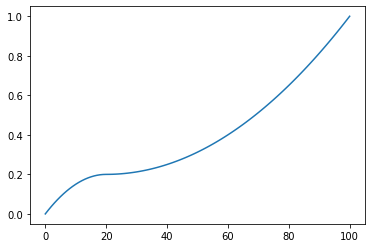

In [38]:
x = np.arange(101)/100
plt.plot(scalePreds(x, center=0.2))

In [39]:
np.set_printoptions(precision=5)

for fold in range(3):
    print('fold', fold)
    data_fold = train_md.loc[train_md.fold == fold]

    preds = np.stack([pickle.load(open(PATH_WORK/'oof_{}_f{}_v{}'.format(name, fold, ver),'rb')) \
        for name, ver in zip(['Densenet161','Densenet169','Densenet201','se_resnext101_32x4d'], [72,73,74,75])])

    assert len(data_fold) == preds.shape[2]
    
    preds = np.clip(preds, 1e-15, 1-1e-15)
    for afunc in afuncs_names:
        apreds = applyAggFunc(preds, afunc)
        res = ((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean((1,2))
        roc = [roc_auc_score(data_fold[all_ich].values.reshape(-1), apreds[i].reshape(-1)) for i in range(4)]
        print('{:7s} {} {}'.format(afunc,res,np.array(roc)))

fold 0
mean    [0.06294 0.06291 0.06293 0.06228] [0.98806 0.98828 0.98838 0.98869]
gmean   [0.06309 0.06305 0.06306 0.06245] [0.98805 0.98825 0.98836 0.98868]
q50     [0.0632  0.06315 0.06314 0.06255] [0.98801 0.98823 0.98834 0.98864]
q25     [0.06393 0.06386 0.06384 0.0634 ] [0.98792 0.98811 0.98826 0.98855]
q75     [0.06324 0.06315 0.06306 0.06275] [0.98805 0.98826 0.98836 0.98866]
psig    [0.0631  0.06307 0.06306 0.06246] [0.98805 0.98825 0.98837 0.98868]
fold 1
mean    [0.06235 0.06219 0.06211 0.06094] [0.98843 0.98824 0.98828 0.98871]
gmean   [0.06244 0.06235 0.06223 0.0612 ] [0.98842 0.98821 0.98825 0.98863]
q50     [0.06261 0.06244 0.06233 0.06129] [0.98839 0.98818 0.98822 0.9886 ]
q25     [0.06299 0.0633  0.06295 0.06228] [0.98831 0.98806 0.9881  0.98839]
q75     [0.06314 0.06228 0.06234 0.06133] [0.98839 0.98824 0.98828 0.98873]
psig    [0.06253 0.06235 0.06233 0.06119] [0.98841 0.98821 0.98823 0.98864]
fold 2
mean    [0.05973 0.06009 0.05988 0.05889] [0.98945 0.98935 0.9896  

In [147]:
preds_all = getPredsOOF()

In [40]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06268, 0.06259, 0.06242, 0.06195])

In [41]:
((- train_md[all_ich].values * np.log(preds_all.mean(1)) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all.mean(1),1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([0.06167, 0.06173, 0.06164, 0.0607 ])

In [42]:
runs_afunc = 'mean'
preds2 = applyAggFunc(preds_all, runs_afunc)

## Selecting models aggregation

In [43]:
for afunc in afuncs_names:
    #print(afunc)
    apreds = applyAggFunc(preds2, afunc, axis=0)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()
    
    if True:
        best_score = res
        best_k = 0
        for k in range(1,50):
            apreds2 = scalePreds(apreds, 1.0 + 0.01 * k)
            apreds2 = np.clip(apreds2, 1e-15, 1-1e-15)

            res2 = ((- train_md[all_ich].values * np.log(apreds2) - (1 - train_md[all_ich].values) * np.log(1 - apreds2))\
                    * class_weights).mean()

            if res2 > best_score: break
            best_score = res2
            best_k = k

        print('{:7s} {:5f}   {:2f} {:5f}'.format(afunc,res,1+0.01*best_k,best_score))
    else:
        print('{:7s} {:5f}'.format(afunc,res))

mean    0.059038   1.130000 0.058948
gmean   0.059353   1.230000 0.059091
q50     0.059475   1.220000 0.059233
q25     0.060483   1.390000 0.059857
q75     0.059765   1.090000 0.059715
psig    0.059371   1.250000 0.059079


In [44]:
apreds = (preds2*np.array([0.25,0.25,0.25,0.25])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.059038001710494545

In [45]:
apreds = (preds2*np.array([0.2,0.2,0.2,0.4])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.058951267412781026

In [46]:
models_afunc = 'mean'

## Scaling

In [47]:
preds_all.shape

(4, 32, 674252, 6)

In [48]:
res = ((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean()

In [49]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06268, 0.06259, 0.06242, 0.06195])

In [60]:
if False:
    best_score = res
    best_k = 0
    for k in range(1,50):
        apreds = scalePreds(preds_all, 1.0 + 0.01 * k)
        apreds = np.clip(apreds, 1e-15, 1-1e-15)

        res2 = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
                * class_weights).mean()

        if res2 > best_score: break
        best_score = res2
        best_k = k

    print('{{:5f}   {:2f} {:5f}'.format(res,1+0.01*best_k,best_score))

## Models behavior per groups

In [51]:
for col in cols_le:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all.mean(1)) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all.mean(1))) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:6d} {:6d} {}'.format(col,i,sz,sz_test,res))

WindowCenter_1_le     0 248151   2157 [0.03698 0.03666 0.03689 0.03648]
WindowCenter_1_le     2  10377     34 [0.11658 0.11432 0.11603 0.11328]
WindowCenter_1_le     3 341674  75369 [0.0641  0.06452 0.06427 0.06312]
WindowCenter_1_le     1  70894    985 [0.12671 0.12636 0.12624 0.12486]
WindowCenter_1_le     4   3156      0 [0.09926 0.10629 0.0935  0.08954]
BitType_le            1 323550   3088 [0.05721 0.05696 0.05691 0.05637]
BitType_le            0 338723  75369 [0.06349 0.06391 0.06364 0.06248]
BitType_le            2   2252     60 [0.12917 0.12549 0.13399 0.12131]
BitType_le            4   6776     28 [0.13029 0.12779 0.13098 0.12574]
BitType_le            3   2951      0 [0.13416 0.13498 0.13628 0.13569]
WindowCenter_0_le     1 248151   2157 [0.03698 0.03666 0.03689 0.03648]
WindowCenter_0_le     4  10343     34 [0.11678 0.11448 0.11617 0.11338]
WindowCenter_0_le     2 151196   2148 [0.12147 0.12143 0.12132 0.11946]
WindowCenter_0_le     0 213404  69272 [0.03542 0.03602 0.03577 0

## Standard deviation analysis

In [52]:
stds = preds_all.std(1)

In [53]:
stds.mean((1))

array([[0.00728, 0.00084, 0.00367, 0.00243, 0.0047 , 0.00482],
       [0.00671, 0.0008 , 0.00339, 0.0022 , 0.00429, 0.00418],
       [0.00636, 0.00079, 0.00317, 0.00211, 0.00393, 0.00426],
       [0.00826, 0.00081, 0.00421, 0.00284, 0.00516, 0.00509]])

In [54]:
stds.shape

(4, 674252, 6)

In [55]:
for i in range(6):
    idx = stds[0,:,i].argmax()
    print(preds_all[0,:,idx,i])

[0.8527  0.05913 0.05106 0.08638 0.84558 0.05423 0.07018 0.84259 0.05583
 0.8708  0.73379 0.05164 0.09345 0.84263 0.05725 0.06355 0.77368 0.74033
 0.06283 0.08262 0.84567 0.75806 0.06629 0.78966 0.0677  0.09178 0.75401
 0.09415 0.05611 0.05517 0.7346  0.06335]
[0.17928 0.70484 0.13346 0.3709  0.11267 0.75836 0.78877 0.83044 0.19143
 0.64169 0.32809 0.56139 0.43426 0.04446 0.71558 0.44262 0.80938 0.4324
 0.33778 0.10167 0.67786 0.06138 0.69132 0.60487 0.09624 0.18512 0.09897
 0.77576 0.22602 0.06148 0.69764 0.47782]
[0.74571 0.01364 0.01121 0.01677 0.75372 0.01375 0.01258 0.76661 0.01464
 0.79489 0.64169 0.01377 0.01875 0.75287 0.01151 0.01513 0.67222 0.63221
 0.01502 0.01762 0.75902 0.65048 0.01416 0.66272 0.01473 0.01909 0.62214
 0.01877 0.0129  0.01269 0.6123  0.01739]
[0.17227 0.13973 0.16937 0.83901 0.14405 0.85284 0.13655 0.84228 0.1366
 0.86727 0.14551 0.84461 0.12285 0.1583  0.17251 0.8441  0.15338 0.8711
 0.14259 0.13445 0.84192 0.83398 0.85628 0.1391  0.15021 0.16618 0.8538
 0

In [56]:
for i in range(6):
    idx = stds[3,:,i].argmax()
    print(preds_all[3,:,idx,i])

[0.98124 0.97982 0.18154 0.16633 0.14569 0.19571 0.99596 0.99338 0.97808
 0.97289 0.9829  0.15496 0.2188  0.98177 0.99533 0.99498 0.96824 0.99605
 0.98322 0.99441 0.16313 0.99583 0.98061 0.96437 0.15794 0.15645 0.99488
 0.15732 0.99349 0.97802 0.97599 0.9767 ]
[0.55692 0.10884 0.20442 0.59746 0.09779 0.0987  0.10347 0.37919 0.17011
 0.61534 0.44436 0.22315 0.51828 0.39134 0.08508 0.27187 0.1056  0.56182
 0.33682 0.1808  0.05546 0.57841 0.66401 0.43134 0.08713 0.14838 0.57806
 0.1089  0.11133 0.15189 0.37018 0.48509]
[0.98467 0.98967 0.98078 0.99126 0.98817 0.10488 0.98166 0.07737 0.9917
 0.09423 0.98358 0.98718 0.0983  0.98882 0.08635 0.9884  0.98168 0.11393
 0.98395 0.98987 0.98443 0.98585 0.98444 0.98965 0.07219 0.99001 0.98623
 0.98711 0.98511 0.13202 0.98884 0.98827]
[0.083   0.9279  0.40258 0.30925 0.14412 0.20776 0.94867 0.31848 0.1495
 0.93255 0.92421 0.92861 0.92252 0.17523 0.94506 0.9094  0.93786 0.95375
 0.91946 0.95732 0.2661  0.94855 0.8828  0.27029 0.27056 0.95248 0.15744


In [57]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([[0.14491, 0.00945, 0.03508, 0.02361, 0.05398, 0.06132],
       [0.14669, 0.01034, 0.03552, 0.02403, 0.05463, 0.06025],
       [0.14752, 0.00944, 0.03492, 0.02384, 0.05311, 0.06174],
       [0.14552, 0.01318, 0.03636, 0.02443, 0.05468, 0.06079]])

In [58]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.05472, 0.05524, 0.05509, 0.05582])

In [59]:
((- preds_all.mean((1,2), keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.6043 , 0.60165, 0.59441, 0.6038 ])

# Inference

In [110]:
dataset_name, filename_add, filename_add2, feat_sz = getDSParams(dataset)

preds = []
stg = time.time()
for fold in range(3):
    preds2 = []
    for anum in range(32):
        predictions = inference_one(fold = fold, anum = anum, bs=bs)
        preds2.append(predictions)
    preds.append(np.stack(preds2))
preds = np.stack(preds)
print('total time', time.time() - stg)

pickle.dump(preds, open(PATH_WORK/'preds_{}_v{}'.format(dataset_name, VERSION),'wb'))

completed epochs: 25
loading model model.b25.f0.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 0
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 14.281991481781006
completed epochs: 25
loading model model.b25.f0.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 0
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 6.552208185195923
completed epochs: 25
loading model model.b25.f0.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 0
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 6.54830002784729
completed epochs: 25
loading model model.b25.f0.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 0
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.153745889663696
completed epochs: 25
loading model model.b25.f0.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 0
dataset test: 2304 loader test: 72
setFeats, augmen

test processing time: 6.466729640960693
completed epochs: 25
loading model model.b25.f1.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 1
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 6.4442925453186035
completed epochs: 25
loading model model.b25.f1.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 1
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.894742965698242
completed epochs: 25
loading model model.b25.f1.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 1
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.62102746963501
completed epochs: 25
loading model model.b25.f1.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 1
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.6126933097839355
completed epochs: 25
loading model model.b25.f1.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 1
dataset te

test processing time: 7.5347044467926025
completed epochs: 25
loading model model.b25.f2.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 2
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.699728965759277
completed epochs: 25
loading model model.b25.f2.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 2
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.624472141265869
completed epochs: 25
loading model model.b25.f2.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 2
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.710848093032837
completed epochs: 25
loading model model.b25.f2.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 2
dataset test: 2304 loader test: 72
setFeats, augmentation -1
test processing time: 7.572486639022827
completed epochs: 25
loading model model.b25.f2.v73
adding dummy serieses 90
DataSet 4 test size 2304 fold 2
dataset te

In [70]:
preds.shape

(3, 32, 78545, 6)

In [69]:
preds.mean((0,1,2))

array([0.13040587, 0.00469896, 0.04276207, 0.03016115, 0.04547987,
       0.05334486], dtype=float32)

# Files transfer

In [89]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_Densenet161_f0_v72 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

Copying file:///home/zahar_chikishev/running/oof_Densenet161_f1_v72 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_Densenet161_f2_v72 [Content-Type=applicatio

In [150]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_Densenet161_v72 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

Copying file:///home/zahar_chikishev/running/preds_Densenet169_v73 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_Densenet201_v74 [Content-Type=application/o

In [ ]:
!gsutil gs://rsna-hemorrhage/results/* .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [35]:
preds_all = getPredsOOF()

In [61]:
preds_all.shape

(4, 32, 674252, 6)

In [64]:
stg = time.time()
for fold in range(3):
    for ds_idx in range(4):
        for target in range(6):
            train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=ds_idx, first_step=True)
print('total running time', time.time() - stg)

starting model 0 fold 0 target 0
obj  0.09907104708842213
obj  0.09892819004361318
obj  0.09861301496709195
obj  0.09905568100165757
obj  0.09846707763627867
obj  0.09863771159124068
obj  0.09855815146715811
obj  0.09858343735029174
obj  0.09826212464588814
obj  0.0981145749996947
obj  0.09806504219266403
obj  0.09804757463273832
obj  0.0980428363711221
obj  0.0980427754767593
obj  0.09804148663073323
obj  0.09804139900592725
obj  0.09804137002508502
obj  0.09804136352515554
obj  0.09804136285137507
obj  0.098041362851374
v76 d0 f0 t0: original ll 0.1001 auc 0.9860, ensemble ll 0.0993 auc 0.9860
running time 4.16136908531189
starting model 0 fold 0 target 1
obj  0.017152870190242524
obj  0.017111446799319186
obj  0.016994172896724617
obj  0.01676896466781925
obj  0.016492940281716054
obj  0.01615700648255296
obj  0.016317749643019304
obj  0.016118607550579752
obj  0.015917744415769364
obj  0.015588037798158347
obj  0.01547997799313031
obj  0.0154359186482124
obj  0.015432554524827717
o

obj  0.014974523824709722
obj  0.014964986526830953
obj  0.014961202311578655
obj  0.014960927019246834
obj  0.014960926957499511
obj  0.014960822306788715
obj  0.014960808943806999
v76 d2 f0 t1: original ll 0.0171 auc 0.9733, ensemble ll 0.0166 auc 0.9732
running time 3.949699878692627
starting model 2 fold 0 target 2
obj  0.040478811693892065
obj  0.04047626658473636
obj  0.04047305609404188
obj  0.04055498098018409
obj  0.040461540627126986
obj  0.040459339372850046
obj  0.04045852653603437
obj  0.04045902685254254
obj  0.040453543967913556
obj  0.04045353804221251
obj  0.04044323473199028
obj  0.04044322910382726
obj  0.040436742422529544
obj  0.040436071275843206
obj  0.04043554701926998
obj  0.0404355044416744
obj  0.04043546942512576
obj  0.04043546206242466
v76 d2 f0 t2: original ll 0.0447 auc 0.9916, ensemble ll 0.0446 auc 0.9916
running time 3.843823194503784
starting model 2 fold 0 target 3
obj  0.025039554684039095
obj  0.025065307545520853
obj  0.025081382629239396
obj  0.

obj  0.01699186733905832
obj  0.016856793846749783
obj  0.01681444248012427
obj  0.016799701426338624
obj  0.01679585480939872
obj  0.016794439736906246
obj  0.01679425576348235
obj  0.016794195271893048
obj  0.016794195221160498
obj  0.01679417565853585
obj  0.016794175640764696
v76 d0 f1 t1: original ll 0.0163 auc 0.9578, ensemble ll 0.0147 auc 0.9578
running time 3.513916015625
starting model 0 fold 1 target 2
obj  0.041467889095624766
obj  0.041440177701903044
obj  0.04143589013263906
obj  0.04142832528904869
obj  0.04141335547491895
obj  0.04139708690852094
obj  0.041398353470351264
obj  0.04139832823149106
obj  0.04138773725056222
obj  0.04136830071759993
obj  0.04136179151108211
obj  0.041360166063868255
obj  0.0413594528899508
obj  0.04135932619938225
obj  0.041359299812680425
obj  0.04135929578525934
v76 d0 f1 t2: original ll 0.0434 auc 0.9914, ensemble ll 0.0433 auc 0.9914
running time 3.18940806388855
starting model 0 fold 1 target 3
obj  0.025805151803121252
obj  0.02581173

obj  0.026245950097549545
obj  0.026235845592610232
obj  0.02625288558396789
obj  0.02619691013026706
obj  0.026244925361650847
obj  0.026218996731394117
obj  0.026221968133025367
obj  0.02621941124220829
obj  0.026188546254774403
obj  0.026154898526883227
obj  0.026149493653963855
obj  0.02614544433543979
obj  0.026144939230650175
obj  0.026144673035875483
obj  0.02614463365374582
obj  0.02614461875331107
obj  0.026144615714484957
obj  0.026144615216902665
v76 d2 f1 t3: original ll 0.0245 auc 0.9967, ensemble ll 0.0244 auc 0.9967
running time 3.3636105060577393
starting model 2 fold 1 target 4
obj  0.06601177707041317
obj  0.06598554048625979
obj  0.06590212877764616
obj  0.06612569905403237
obj  0.06588431081422962
obj  0.06589425486582222
obj  0.0658948063421742
obj  0.06589933283114953
obj  0.06587656302150743
obj  0.06583949982008733
obj  0.06583949604678009
obj  0.06583393785880999
obj  0.06583200132690405
obj  0.06583198161636768
obj  0.06583187523862943
obj  0.06583185318171472

obj  0.06625772068030814
obj  0.06625771679220359
obj  0.0662577075541715
v76 d0 f2 t4: original ll 0.0652 auc 0.9814, ensemble ll 0.0651 auc 0.9814
running time 3.709974527359009
starting model 0 fold 2 target 5
obj  0.08379866847083157
obj  0.08366255154896819
obj  0.08350034860125438
obj  0.08376899484299849
obj  0.08342756669387166
obj  0.08346776352757247
obj  0.0834660967831078
obj  0.08346183142770656
obj  0.08332464808475593
obj  0.08322415000867651
obj  0.08318716008462161
obj  0.08317903798761841
obj  0.08317710189557921
obj  0.08317643034569577
obj  0.08317642967133414
obj  0.08317626598593726
obj  0.08317624093061678
obj  0.08317623716305397
obj  0.08317623618473749
obj  0.08317623594336271
v76 d0 f2 t5: original ll 0.0781 auc 0.9801, ensemble ll 0.0775 auc 0.9801
running time 4.181798934936523
starting model 1 fold 2 target 0
obj  0.10121223989504909
obj  0.10110376861534237
obj  0.1008296449749687
obj  0.10152296348421277
obj  0.10077106481615779
obj  0.10101335550694499


obj  0.09909429143309252
obj  0.0989183864199721
obj  0.09884466134540602
obj  0.09881663749704153
obj  0.09881594620466352
obj  0.09880903896241731
obj  0.09880888856736075
obj  0.09880887343220295
obj  0.09880785308841643
obj  0.09880785274329085
obj  0.09880768268437111
obj  0.09880763542584693
obj  0.0988076251704405
obj  0.09880762283649376
obj  0.0988076223265247
v76 d3 f2 t0: original ll 0.0958 auc 0.9878, ensemble ll 0.0950 auc 0.9878
running time 4.010719060897827
starting model 3 fold 2 target 1
obj  0.015462246383702843
obj  0.01545362552021862
obj  0.015470160577136044
obj  0.015419244297045177
obj  0.015477138070137229
obj  0.01545560438242597
obj  0.015457934713095211
obj  0.015452585782768887
obj  0.015416447981949867
obj  0.01537640204223976
obj  0.015362605277079514
obj  0.01536059424270633
obj  0.015359947157378722
obj  0.015359805715102657
obj  0.015359776852778053
v76 d3 f2 t1: original ll 0.0157 auc 0.9660, ensemble ll 0.0155 auc 0.9660
running time 3.0481102466583

In [74]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx != -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.06144 ensemble ll 0.06087
valid original ll 0.06144 ensemble ll 0.06098


In [67]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=-1, first_step=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.09500484923394473
obj  0.09529367923647915
obj  0.09528080618048654
obj  0.0952703356675507
obj  0.09526378433992612
obj  0.09524753240650495
obj  0.09523823521652233
obj  0.09522612351625587
obj  0.09520849534498264
obj  0.09498668021115456
obj  0.09490227498622372
obj  0.09488815133162556
obj  0.09487456085983453
obj  0.09486223115507886
obj  0.09484992470640322
obj  0.09483943418450312
obj  0.09483046262072763
obj  0.09482260925370631
obj  0.0948141659094314
obj  0.09480503930269839
obj  0.09479378258139731
obj  0.09478244445672451
obj  0.09477304107031796
obj  0.09476035047912414
obj  0.09473661902195346
obj  0.09469999931211286
obj  0.09468409347354524
obj  0.09468275515725745
obj  0.09468263201675124
obj  0.09468262851207376
obj  0.09468262790040638
obj  0.09468262789839663
obj  0.09468262789805211
v76 d-1 f0 t0: original ll 0.0963 auc 0.9871, ensemble ll 0.0962 auc 0.9871
running time 5.222867488861084
starting fold 0 target 1
obj  0.0140433130779

obj  0.038806699386862924
obj  0.03880669938665379
obj  0.03880669938665379
obj  0.038806699386549216
obj  0.038806699386549216
obj  0.03880669938649696
obj  0.03880669938649696
v76 d-1 f0 t2: original ll 0.0422 auc 0.9928, ensemble ll 0.0423 auc 0.9928
running time 13.786998271942139
starting fold 0 target 3
obj  0.023609773018361778
obj  0.023615096321507056
obj  0.0236142404333964
obj  0.023613705377956637
obj  0.02361413279909676
obj  0.02361461177603344
obj  0.023613872485157013
obj  0.023612287065513545
obj  0.023608741594337106
obj  0.023586870166904507
obj  0.023585724506943247
obj  0.02358572920078412
obj  0.023584876794310483
obj  0.023584727346692584
obj  0.02358353850558561
obj  0.023583185846083776
obj  0.023583098333935085
obj  0.02358221147818194
obj  0.023581900491732827
obj  0.02358175231295349
obj  0.02358167081656074
obj  0.02358073563913367
obj  0.023580458128405004
obj  0.023580278129068512
obj  0.02358015137972864
obj  0.023580054718356478
obj  0.02357997392635130

obj  0.0944706633312144
obj  0.09445941361275961
obj  0.09444765499743382
obj  0.09443857678229935
obj  0.09442892422493561
obj  0.09440660593114547
obj  0.09439341220827879
obj  0.09439251623210515
obj  0.09439242558687126
obj  0.09439242311549899
obj  0.09439242292293465
obj  0.094392422922531
obj  0.09439242292250352
obj  0.09439242292250324
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj  0.09439242292250323
obj

obj  0.06389547190412385
obj  0.0638954719039238
obj  0.0638954719039238
obj  0.06389547190382376
obj  0.06389547190382376
v76 d-1 f1 t4: original ll 0.0630 auc 0.9810, ensemble ll 0.0631 auc 0.9811
running time 7.777350664138794
starting fold 1 target 5
obj  0.07802895524673249
obj  0.07801669965448224
obj  0.07801198310895124
obj  0.07802182788577706
obj  0.07842034015450255
obj  0.07841540714520158
obj  0.07841181779465262
obj  0.07835464974122705
obj  0.07826078128280047
obj  0.0780778546283492
obj  0.07807341643138034
obj  0.07802355056908397
obj  0.07790756620310457
obj  0.07790594722080679
obj  0.07790594212763206
obj  0.07790590193242067
obj  0.07790590193164486
v76 d-1 f1 t5: original ll 0.0798 auc 0.9791, ensemble ll 0.0796 auc 0.9792
running time 3.034079074859619
starting fold 2 target 0
obj  0.09660699921819424
obj  0.097152201988414
obj  0.09713518083122927
obj  0.09712166819644497
obj  0.09711293292433218
obj  0.09709233042403975
obj  0.09708016422553647
obj  0.097066510

In [75]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx == -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.05883 ensemble ll 0.05871
valid original ll 0.05891 ensemble ll 0.05883


In [133]:
VERSION = 76

In [146]:
preds.shape

(4, 3, 32, 78545, 6)

In [149]:
stg = time.time()
preds = np.stack([pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet161', 72),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 73),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 74),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 78),'rb'))])

test_preds_trgt = []
for target in range(6):
    
    test_preds_folds = []
    for fold in range(3):
        
        test_preds = []
        for ds_idx in range(4):
            model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                     .format(ds_idx,fold,target,VERSION),'rb'))
            X,y,ll_train,auc_train =  getFirstStepX(None, preds[:,fold], TH=model.prior, 
                                                    powerLow=model.powerLow, powerHigh=model.powerHigh, 
                                                    fold=fold, target=target, ds_idx=ds_idx, mode='test')
            test_preds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
        
        X = np.stack(test_preds)
        model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                 .format(-1,fold,target,VERSION),'rb'))
        test_preds_folds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    X = np.stack(test_preds_folds).mean(0)
    test_preds_trgt.append(X)

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

> <ipython-input-148-cef4c255a535>(28)getFirstStepX()
-> X0 = preds_all[ds_idx]
(Pdb) preds_all.shape
(4, 32, 78545, 6)
(Pdb) X0 = preds_all[ds_idx]
(Pdb) X0.shape
(32, 78545, 6)
(Pdb) q


BdbQuit: 

In [137]:
predictions.shape

(78545, 6)

# Submitting

In [51]:
preds = 0.5* (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')))

In [53]:
preds = (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 53),'rb'))) / 3

In [114]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet161', 72),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 73),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 74),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 78),'rb'))])

In [118]:
np.set_printoptions(precision=5)

In [147]:
preds.std(2).mean((1,2))

array([[0.00797, 0.00125, 0.0039 , 0.0026 , 0.00511, 0.00504],
       [0.00727, 0.00117, 0.00363, 0.00238, 0.00469, 0.00434],
       [0.00687, 0.00118, 0.00313, 0.00217, 0.00415, 0.00443],
       [0.00905, 0.00102, 0.00443, 0.00315, 0.00575, 0.00509]],
      dtype=float32)

In [63]:
((- preds.mean((1,2), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([[0.15249, 0.01507, 0.03719, 0.02508, 0.05596, 0.06206],
       [0.14765, 0.01445, 0.03652, 0.02455, 0.05567, 0.05837],
       [0.14786, 0.01586, 0.0346 , 0.02439, 0.05371, 0.06038],
       [0.1466 , 0.01732, 0.03613, 0.02529, 0.05583, 0.05959]])

In [65]:
((- preds.mean((1,2,3), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2,3), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3,4))

array([0.54027, 0.54585, 0.53983, 0.54938])

In [189]:
preds = pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 75),'rb'))

In [35]:
preds.shape

(3, 32, 78545, 6)

In [194]:
predictions = np.quantile(preds,q=0.5,axis=(1)).mean(0)

In [120]:
predictions = preds.mean((0,1,2))

In [73]:
predictions = scalePreds(predictions, 1.13)

In [138]:
test_md['pred_any'] = predictions[:,0]

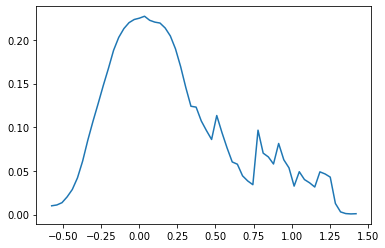

In [139]:
plt.plot(test_md[['pos_idx1','pred_any']].groupby('pos_idx1').mean())

In [89]:
predictions = np.exp(np.log(preds).mean((0,1)))

In [43]:
predictions = 1 / (1 + np.exp(-(np.log(preds/(1-preds)).mean((0,1)))))

In [73]:
predictions = preds.mean((0,1))

In [140]:
predictions.mean(0)

array([0.13103, 0.00573, 0.04287, 0.03007, 0.04574, 0.05545])

In [57]:
predictions.mean(0)

array([0.1280228 , 0.00678272, 0.04317398, 0.03195811, 0.04593468,
       0.05528003], dtype=float32)

In [141]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})

In [142]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13102866828708357

In [58]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1281835436820984

In [77]:
best_sub = pd.read_csv(PATH/'submission_061.csv')

In [78]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13475628267250275

In [143]:
sub.to_csv(PATH/'sub.csv', index=False)

In [144]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9941991502803574

In [63]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9944464662920349

In [145]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "TPU, d161+d169+d201+s101, 32TTA, 3folds, ensemble"

100%|██████████████████████████████████████| 20.7M/20.7M [00:03<00:00, 6.03MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [87]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "TPU, d161+d169+d201+s101, 32TTA, 3folds, mean/ensemble/mean "

Traceback (most recent call last):
  File "/anaconda3/envs/torch-xla-nightly/bin/kaggle", line 10, in <module>
    sys.exit(main())
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 545, in competition_submit_cli
    competition, quiet)
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 496, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'C:/StudioProjects/Hemorrhage/sub.csv'
